# Evaluation Metrics

Formula 1 is the world's fastest and most technologically advanced motorsport, where drivers and teams compete in high-speed races across the globe. Each race is packed with excitement, strategy, and luckily for us, data.

## Problem Statement

### 🏎️ Predicting Formula 1 Driver Positions

In this activity, you will explore a real-world Formula 1 dataset from [F1nalyze Formula 1 Datathon](https://www.kaggle.com/competitions/f1nalyze-datathon-ieeecsmuj/overview). This dataset contains detailed information about past F1 races, including:

- Race results (`position`): Where each driver finished in each race
- Driver and team details: Information about the drivers and teams (constructors) they race for
- Race conditions: Data like starting grid position, points scored, laps completed, etc.

Many factors (e.g., starting position, team strategy, weather) can influence the outcome of a race. By analyzing this data, we can try to predict where each driver might finish in future races.

## Our Focus: Evaluation Metrics

While building a model to predict race results is exciting, our main goal in this activity is to learn how to evaluate the performance of such models. In machine learning, evaluation metrics help us understand how well our predictions match the real outcomes. By experimenting with the F1 dataset, you’ll see how different metrics (like accuracy, mean absolute error, and more) can tell different stories about model performance.

## Data

- `resultId`: Unique identifier for the result.
- `racerId`: Identifier for the race.
- `driverId`: Identifier for the driver.
- `constructorId`: Identifier for the constructor (team).
- `number`: Car number of the driver.
- `grid`: Starting position on the grid.
- `position_x`: Position from where the driver started in the grid
- `positionText_x`: Starting Position in text format (e.g., 1st, 2nd).
- `positionOrder`: Order of starting position.
- `points`: Points scored in the race.
- `laps`: Total number of laps in the race.
- `time_x`: Time taken in the fastest lap
- `timetaken_in_millisec`: Time taken in milliseconds.
- `fastestLap`: Lap number of the fastest lap.
- `rank`: Rank in the race.
- `fastestLapTime`: Time of the fastest lap.
- `max_speed`: Maximum speed achieved during the race.
- `statusId`: Identifier for the race status.
- `year`: Year of the race.
- `round`: Round number of the race.
- `circuitId`: Identifier for the circuit.
- `grand_prix`: Name of the Grand Prix.
- `date`: Date of the race.
- `time_y`: Time of the race .
- `url_x`: URL associated with the race.
- `fp1_date`: Date of the first practice session.
- `fp1_time`: Time of the first practice session.
- `fp2_date`: Date of the second practice session.
- `fp2_time`: Time of the second practice session.
- `fp3_date`: Date of the third practice session.
- `fp3_time`: Time of the third practice session.
- `quali_date`: Date of the qualifying session.
- `quali_time`: Time of the qualifying session.
- `sprint_date`: Date of the sprint race session.
- `sprint_time`: Time of the sprint race session.
- `driverRef`: Reference to the driver.
- `driver_num`: Unique identifier for the driver.
- `driver_code`: Code assigned to the driver.
- `forename`: First name of the driver.
- `surname`: Last name of the driver.
- `dob`: Date of birth of the driver.
- `nationality`: Nationality of the driver.
- `url_y`: URL associated with the driver.
- `driverStandingsId`: Identifier for driver standings.
- `raceId_y`: Identifier for the race associated with the driver.
- `points_y`: Points scored by the driver.
- `position`: Final position for a particular lap. (Target Variable)
- `positionText_y`: Position text description.
- `wins`: Number of wins by the driver.
- `constructorRef`: Reference to the constructor (team).
- `company`: Company associated with the constructor.
- `nationality_y`: Nationality of the constructor.
- `url`: URL associated with the constructor.
- `status`: Status related to the driver or constructor.
- `result_driver_standing`: The unique id for the row.


## Set Up

We first have to do a few things before we can evaluate our models (of course)!

1. Import libraries
2. Get our data
3. Clean our data
4. Data preprocessing
5. Creating and training our models

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import OrdinalEncoder

from sklearn.pipeline import Pipeline
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import accuracy_score

In [2]:
# See all columns for table since we have a lot of columns
pd.set_option('display.max_columns', None)

# Set max number of datapoints to use
NUM_DATAPOINTS = 15_000

In [3]:
# Download the training and testing dataset
%pip install gdown
%pip install zipfile36

import os
import gdown
import zipfile

# Check if data/f1nalyze exists
if not os.path.exists('data/f1nalyze'):
    os.makedirs('data', exist_ok=True)  # Ensure data/ exists

    # Download the zip file into data/
    zip_path = 'data/f1nalyze.zip'
    gdown.download(
        'https://drive.google.com/uc?export=download&id=1mRepXFuLfaPNBAlOonoe2dsCqR16uih4',
        zip_path,
        quiet=False
    )

    # Extract zip into data/f1nalyze/
    with zipfile.ZipFile(zip_path, 'r') as zip_ref:
        zip_ref.extractall('data/f1nalyze')

    # Step 4: Remove the zip file
    os.remove(zip_path)
else:
    print("data/f1nalyze already exists, skipping download and extraction.")

  Using cached gdown-5.2.0-py3-none-any.whl.metadata (5.8 kB)
Using cached gdown-5.2.0-py3-none-any.whl (18 kB)
Note: you may need to restart the kernel to use updated packages.
  Using cached zipfile36-0.1.3-py3-none-any.whl.metadata (736 bytes)
Using cached zipfile36-0.1.3-py3-none-any.whl (20 kB)
Note: you may need to restart the kernel to use updated packages.
data/f1nalyze already exists, skipping download and extraction.


In [4]:
f1_data_path = "data/f1nalyze/"

### Read Data

In [5]:
train = pd.read_csv(f1_data_path + "train.csv")

/var/folders/fg/lvh1jbmd4rq06w0kvqyjg57h0000gn/T/ipykernel_90336/4045425500.py:1: DtypeWarning: Columns (4,13,14,16,47) have mixed types. Specify dtype option on import or set low_memory=False.
  train = pd.read_csv(f1_data_path + "train.csv")


In [6]:
train.head()

,resultId,racerId,driverId,constructorId,number,grid,position_x,positionText_x,positionOrder,points,laps,time_x,timetaken_in_millisec,fastestLap,rank,fastestLapTime,max_speed,statusId,year,round,circuitId,grand_prix,date,time_y,url_x,fp1_date,fp1_time,fp2_date,fp2_time,fp3_date,fp3_time,quali_date,quali_time,sprint_date,sprint_time,driverRef,driver_num,driver_code,forename,surname,dob,nationality,url_y,driverStandingsId,raceId_y,points_y,position,positionText_y,wins,constructorRef,company,nationality_y,url,status,result_driver_standing
0,20025,833,642,51,2,1,1,1,1,9.0,70,2:13:23.6,8003600,\N,\N,\N,\N,1,1950,1,9,British Grand Prix,1950-05-13,\N,http://en.wikipedia.org/wiki/1950_British_Gran...,\N,\N,\N,\N,\N,\N,\N,\N,\N,\N,farina,\N,\N,Nino,Farina,1906-10-30,Italian,http://en.wikipedia.org/wiki/Nino_Farina,46079,792,3.33,3,3,0,alfa,Alfa Romeo,Swiss,http://en.wikipedia.org/wiki/Alfa_Romeo_in_For...,Finished,922731975
1,20025,833,642,51,2,1,1,1,1,9.0,70,2:13:23.6,8003600,\N,\N,\N,\N,1,1950,1,9,British Grand Prix,1950-05-13,\N,http://en.wikipedia.org/wiki/1950_British_Gran...,\N,\N,\N,\N,\N,\N,\N,\N,\N,\N,farina,\N,\N,Nino,Farina,1906-10-30,Italian,http://en.wikipedia.org/wiki/Nino_Farina,46101,793,6.33,3,3,0,alfa,Alfa Romeo,Swiss,http://en.wikipedia.org/wiki/Alfa_Romeo_in_For...,Finished,923172525
2,20025,833,642,51,2,1,1,1,1,9.0,70,2:13:23.6,8003600,\N,\N,\N,\N,1,1950,1,9,British Grand Prix,1950-05-13,\N,http://en.wikipedia.org/wiki/1950_British_Gran...,\N,\N,\N,\N,\N,\N,\N,\N,\N,\N,farina,\N,\N,Nino,Farina,1906-10-30,Italian,http://en.wikipedia.org/wiki/Nino_Farina,46134,794,6.33,4,4,0,alfa,Alfa Romeo,Swiss,http://en.wikipedia.org/wiki/Alfa_Romeo_in_For...,Finished,923833350
3,20025,833,642,51,2,1,1,1,1,9.0,70,2:13:23.6,8003600,\N,\N,\N,\N,1,1950,1,9,British Grand Prix,1950-05-13,\N,http://en.wikipedia.org/wiki/1950_British_Gran...,\N,\N,\N,\N,\N,\N,\N,\N,\N,\N,farina,\N,\N,Nino,Farina,1906-10-30,Italian,http://en.wikipedia.org/wiki/Nino_Farina,46202,795,10.33,3,3,0,alfa,Alfa Romeo,Swiss,http://en.wikipedia.org/wiki/Alfa_Romeo_in_For...,Finished,925195050
4,20025,833,642,51,2,1,1,1,1,9.0,70,2:13:23.6,8003600,\N,\N,\N,\N,1,1950,1,9,British Grand Prix,1950-05-13,\N,http://en.wikipedia.org/wiki/1950_British_Gran...,\N,\N,\N,\N,\N,\N,\N,\N,\N,\N,farina,\N,\N,Nino,Farina,1906-10-30,Italian,http://en.wikipedia.org/wiki/Nino_Farina,46271,796,10.33,4,4,0,alfa,Alfa Romeo,Swiss,http://en.wikipedia.org/wiki/Alfa_Romeo_in_For...,Finished,926576775


In [7]:
test = pd.read_csv(f1_data_path + "validation.csv")

/var/folders/fg/lvh1jbmd4rq06w0kvqyjg57h0000gn/T/ipykernel_90336/3166297837.py:1: DtypeWarning: Columns (13,16,36) have mixed types. Specify dtype option on import or set low_memory=False.
  test = pd.read_csv(f1_data_path + "validation.csv")


In [8]:
test.head()

,resultId,racerId,driverId,constructorId,number,grid,position_x,positionText_x,positionOrder,points,laps,time_x,timetaken_in_millisec,fastestLap,rank,fastestLapTime,max_speed,statusId,year,round,circuitId,grand_prix,date,time_y,url_x,fp1_date,fp1_time,fp2_date,fp2_time,fp3_date,fp3_time,quali_date,quali_time,sprint_date,sprint_time,driverRef,driver_num,driver_code,forename,surname,dob,nationality,url_y,driverStandingsId,raceId_y,points_y,position,positionText_y,wins,constructorRef,company,nationality_y,url,status,result_driver_standing
0,22109,899,17,9,2,4,2,2,2,18.0,71,+10.452,5566752,51,1,1:15.436,205.636,1,2013,19,18,Brazilian Grand Prix,2013-11-24,16:00:00,http://en.wikipedia.org/wiki/2013_Brazilian_Gr...,\N,\N,\N,\N,\N,\N,\N,\N,\N,\N,webber,\N,WEB,Mark,Webber,1976-08-27,Australian,http://en.wikipedia.org/wiki/Mark_Webber_(raci...,63816,340,28.0,8,8,0,red_bull,Red Bull,Austrian,http://en.wikipedia.org/wiki/Red_Bull_Racing,Finished,1410907944
1,22109,899,17,9,2,4,2,2,2,18.0,71,+10.452,5566752,51,1,1:15.436,205.636,1,2013,19,18,Brazilian Grand Prix,2013-11-24,16:00:00,http://en.wikipedia.org/wiki/2013_Brazilian_Gr...,\N,\N,\N,\N,\N,\N,\N,\N,\N,\N,webber,\N,WEB,Mark,Webber,1976-08-27,Australian,http://en.wikipedia.org/wiki/Mark_Webber_(raci...,63840,341,53.0,4,4,1,red_bull,Red Bull,Austrian,http://en.wikipedia.org/wiki/Red_Bull_Racing,Finished,1411438560
2,22109,899,17,9,2,4,2,2,2,18.0,71,+10.452,5566752,51,1,1:15.436,205.636,1,2013,19,18,Brazilian Grand Prix,2013-11-24,16:00:00,http://en.wikipedia.org/wiki/2013_Brazilian_Gr...,\N,\N,\N,\N,\N,\N,\N,\N,\N,\N,webber,\N,WEB,Mark,Webber,1976-08-27,Australian,http://en.wikipedia.org/wiki/Mark_Webber_(raci...,63888,342,78.0,1,1,2,red_bull,Red Bull,Austrian,http://en.wikipedia.org/wiki/Red_Bull_Racing,Finished,1412499792
3,22109,899,17,9,2,4,2,2,2,18.0,71,+10.452,5566752,51,1,1:15.436,205.636,1,2013,19,18,Brazilian Grand Prix,2013-11-24,16:00:00,http://en.wikipedia.org/wiki/2013_Brazilian_Gr...,\N,\N,\N,\N,\N,\N,\N,\N,\N,\N,webber,\N,WEB,Mark,Webber,1976-08-27,Australian,http://en.wikipedia.org/wiki/Mark_Webber_(raci...,63912,343,93.0,1,1,2,red_bull,Red Bull,Austrian,http://en.wikipedia.org/wiki/Red_Bull_Racing,Finished,1413030408
4,22109,899,17,9,2,4,2,2,2,18.0,71,+10.452,5566752,51,1,1:15.436,205.636,1,2013,19,18,Brazilian Grand Prix,2013-11-24,16:00:00,http://en.wikipedia.org/wiki/2013_Brazilian_Gr...,\N,\N,\N,\N,\N,\N,\N,\N,\N,\N,webber,\N,WEB,Mark,Webber,1976-08-27,Australian,http://en.wikipedia.org/wiki/Mark_Webber_(raci...,63936,344,103.0,3,3,2,red_bull,Red Bull,Austrian,http://en.wikipedia.org/wiki/Red_Bull_Racing,Finished,1413561024


In [9]:
print(train.shape)
print(test.shape)

(2830101, 55)
(353762, 55)


In [10]:
# Take a subset of our data
# Since our training data has over 2M samples, training will take a long time!
# Our testing data has 353,762 samples
train = train.sample(n=NUM_DATAPOINTS, random_state=42)
test = test.sample(n=NUM_DATAPOINTS, random_state=42)

print(train.shape)
print(test.shape)

(15000, 55)
(15000, 55)


### Pre-processing

In [11]:
# Find columns in the training dataset but not in testing set
col_not_in_test = set(train.columns) - set(test.columns)

print("Columns not in test:")
for col in col_not_in_test:
    print(col)

Columns not in test:


In [12]:
# Replace "\N" with NaN
# so pandas recognizes them as missing values

train.replace("\\N", pd.NA, inplace=True)
test.replace("\\N", pd.NA, inplace=True)

In [13]:
train_empty = train.isnull().sum()
train_empty

resultId                      0
racerId                       0
driverId                      0
constructorId                 0
number                        1
grid                          0
position_x                 6015
positionText_x                0
positionOrder                 0
points                        0
laps                          0
time_x                     9904
timetaken_in_millisec      9904
fastestLap                11177
rank                      11153
fastestLapTime            11177
max_speed                 11177
statusId                      0
year                          0
round                         0
circuitId                     0
grand_prix                    0
date                          0
time_y                    11391
url_x                         0
fp1_date                  15000
fp1_time                  15000
fp2_date                  15000
fp2_time                  15000
fp3_date                  15000
fp3_time                  15000
quali_da

In [14]:
test_empty = test.isnull().sum()
test_empty

resultId                      0
racerId                       0
driverId                      0
constructorId                 0
number                        0
grid                          0
position_x                 2650
positionText_x                0
positionOrder                 0
points                        0
laps                          0
time_x                     6637
timetaken_in_millisec      6637
fastestLap                  722
rank                          0
fastestLapTime              722
max_speed                   722
statusId                      0
year                          0
round                         0
circuitId                     0
grand_prix                    0
date                          0
time_y                        0
url_x                         0
fp1_date                  15000
fp1_time                  15000
fp2_date                  15000
fp2_time                  15000
fp3_date                  15000
fp3_time                  15000
quali_da

In [15]:
# Only use relevant columns
columns_to_include = ["grid", "positionText_x", "points", "laps", "round", "nationality", "points_y", "position", "wins", "company", "status"]

train_clean = train[columns_to_include]

print("Train dataset with only relevant columns:")
train_clean

Train dataset with only relevant columns:


,grid,positionText_x,points,laps,round,nationality,points_y,position,wins,company,status
442208,14,13,0.0,53,9,British,0.0,14,0,Surtees,+1 Lap
1784776,1,1,10.0,65,5,Finnish,54.0,3,2,McLaren,Finished
1704101,7,7,0.0,53,13,Austrian,49.0,5,2,Benetton,Finished
1362592,14,7,0.0,53,12,Italian,0.0,22,0,Jordan,Finished
2360077,4,2,8.0,56,16,Spanish,191.0,2,4,McLaren,Finished
...,...,...,...,...,...,...,...,...,...,...,...
2813679,13,R,0.0,36,14,Australian,12.0,9,0,Red Bull,Collision
1560462,6,2,6.0,72,2,French,13.0,7,0,Ferrari,Finished
411175,17,R,0.0,22,13,French,20.0,7,0,Iso Marlboro,Engine
2160666,4,R,0.0,25,3,German,41.0,5,0,Williams,Engine


In [16]:
train_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 15000 entries, 442208 to 1172415
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   grid            15000 non-null  int64  
 1   positionText_x  15000 non-null  object 
 2   points          15000 non-null  float64
 3   laps            15000 non-null  int64  
 4   round           15000 non-null  int64  
 5   nationality     15000 non-null  object 
 6   points_y        15000 non-null  float64
 7   position        15000 non-null  int64  
 8   wins            15000 non-null  int64  
 9   company         15000 non-null  object 
 10  status          15000 non-null  object 
dtypes: float64(2), int64(5), object(4)
memory usage: 1.4+ MB


In [17]:
# See unique values for relevant columns
cols = ["positionText_x", "company", "status", "nationality"]

for col in cols:
    uniq = train_clean[col].unique()
    print(f"{col}:\n", uniq, "\n")

positionText_x:
 ['13' '1' '7' '2' '12' 'R' '15' '10' 'N' '9' '8' '11' '4' '3' 'W' '5' 'F'
 '22' '6' '14' 'D' '20' '18' '16' '17' '21' '24' '19' 'E' '23'] 

company:
 ['Surtees' 'McLaren' 'Benetton' 'Jordan' 'Ligier' 'Ferrari' 'Lotus F1'
 'Team Lotus' 'Arrows' 'Shadow' 'Bellasi' 'Tyrrell' 'Williams' 'Merzario'
 'BAR' 'Force India' 'Renault' 'Cooper' 'Lotus-BRM' 'BRM' 'Zakspeed'
 'Maserati' 'McLaren-Ford' 'Brabham-Climax' 'Toyota' 'Wolf' 'Sauber'
 'Eagle-Weslake' 'Larrousse' 'Mercedes' 'Penske' 'Red Bull'
 'Brabham-Alfa Romeo' 'Stewart' 'Minardi' 'Brabham' 'HRT' 'Honda' 'Osella'
 'Jaguar' 'Cooper-Climax' 'March' 'Shadow-Ford' 'Gordini' 'Footwork'
 'Lotus-Climax' 'Lotus-Ford' 'March-Ford' 'BRP' 'Brawn' 'Prost' 'Ensign'
 'Alfa Romeo' 'AGS' 'Super Aguri' 'Connaught' 'Fittipaldi'
 'Cooper-Maserati' 'BMW Sauber' 'Lotus' 'Dallara' 'Parnelli' 'Lola'
 'Talbot-Lago' 'Toro Rosso' 'Toleman' 'Fondmetal' 'Leyton House'
 'McLaren-BRM' 'Iso Marlboro' 'ATS' 'Vanwall' 'Virgin' 'Watson' 'Theodore'
 'Pors

In [18]:
# Encode categorial variables
ordinal_cols = ["positionText_x"]
nominal_cols = ["nationality", "company", "status"]
numerical_cols = [col for col in train_clean.columns if col not in ordinal_cols and col not in nominal_cols and col != "position"]

# Define position order
position_order = [
    ['1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19', '20', '21', '22', '23', '24', '25', '26', '27', '28', '29', '30', '31', '32', '33', 'R', 'N', 'W', 'D', 'F', 'E']
]

# Create ordinal encoder
ordinal_encoder = OrdinalEncoder(categories=position_order)

# Create column transformer
preprocessor = ColumnTransformer(
    transformers=[
        ("ord", ordinal_encoder, ordinal_cols),
        ("cat", OneHotEncoder(handle_unknown="ignore"), nominal_cols),
        ("num", "passthrough", numerical_cols)
    ]
)

### Training Our Model(s)

We are going to use evaluation metrics to compare a Decision Tree vs. Random Forest.

We are going to use a **pipeline** to sequentially apply a list of transforms and a final estimator i.e., apply our transformations and model fitting/training at the same time!

Read the scikit-learn documentation on [DecisionTreeClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html#sklearn.tree.DecisionTreeClassifier) and  [RandomForestClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html) to see which hyperparameters you can adjust!

In [19]:
# Use a **pipeline** to combine preprocessing and modeling
pipeline_decision_tree = Pipeline([
    ('preprocess', preprocessor),
    ('model', DecisionTreeClassifier())
])

pipeline_forest = Pipeline([
    ('preprocess', preprocessor),
    ('model', RandomForestClassifier())
])

In [20]:
pipeline_decision_tree

Pipeline(steps=[('preprocess',
                 ColumnTransformer(transformers=[('ord',
                                                  OrdinalEncoder(categories=[['1',
                                                                              '2',
                                                                              '3',
                                                                              '4',
                                                                              '5',
                                                                              '6',
                                                                              '7',
                                                                              '8',
                                                                              '9',
                                                                              '10',
                                                                              '11',
                                                                              '12',
                                                                              '13',
                                                                              '14',
                                                                              '15',
                                                                              '16',
                                                                              '17',
                                                                              '18',
                                                                              '19',
                                                                              '20',
                                                                              '21',
                                                                              '22',
                                                                              '23',
                                                                              '24',
                                                                              '25',
                                                                              '26',
                                                                              '27',
                                                                              '28',
                                                                              '29',
                                                                              '30', ...]]),
                                                  ['positionText_x']),
                                                 ('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['nationality', 'company',
                                                   'status']),
                                                 ('num', 'passthrough',
                                                  ['grid', 'points', 'laps',
                                                   'round', 'points_y',
                                                   'wins'])])),
                ('model', DecisionTreeClassifier())])

In [21]:
pipeline_forest

Pipeline(steps=[('preprocess',
                 ColumnTransformer(transformers=[('ord',
                                                  OrdinalEncoder(categories=[['1',
                                                                              '2',
                                                                              '3',
                                                                              '4',
                                                                              '5',
                                                                              '6',
                                                                              '7',
                                                                              '8',
                                                                              '9',
                                                                              '10',
                                                                              '11',
                                                                              '12',
                                                                              '13',
                                                                              '14',
                                                                              '15',
                                                                              '16',
                                                                              '17',
                                                                              '18',
                                                                              '19',
                                                                              '20',
                                                                              '21',
                                                                              '22',
                                                                              '23',
                                                                              '24',
                                                                              '25',
                                                                              '26',
                                                                              '27',
                                                                              '28',
                                                                              '29',
                                                                              '30', ...]]),
                                                  ['positionText_x']),
                                                 ('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['nationality', 'company',
                                                   'status']),
                                                 ('num', 'passthrough',
                                                  ['grid', 'points', 'laps',
                                                   'round', 'points_y',
                                                   'wins'])])),
                ('model', RandomForestClassifier())])

In [22]:
# Separate our data
X_train = train_clean.drop(columns="position")
y_train = train_clean["position"]

X_test = test.drop(columns="position")
y_test = test["position"]

In [23]:
pipeline_decision_tree.fit(X_train, y_train)

Pipeline(steps=[('preprocess',
                 ColumnTransformer(transformers=[('ord',
                                                  OrdinalEncoder(categories=[['1',
                                                                              '2',
                                                                              '3',
                                                                              '4',
                                                                              '5',
                                                                              '6',
                                                                              '7',
                                                                              '8',
                                                                              '9',
                                                                              '10',
                                                                              '11',
                                                                              '12',
                                                                              '13',
                                                                              '14',
                                                                              '15',
                                                                              '16',
                                                                              '17',
                                                                              '18',
                                                                              '19',
                                                                              '20',
                                                                              '21',
                                                                              '22',
                                                                              '23',
                                                                              '24',
                                                                              '25',
                                                                              '26',
                                                                              '27',
                                                                              '28',
                                                                              '29',
                                                                              '30', ...]]),
                                                  ['positionText_x']),
                                                 ('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['nationality', 'company',
                                                   'status']),
                                                 ('num', 'passthrough',
                                                  ['grid', 'points', 'laps',
                                                   'round', 'points_y',
                                                   'wins'])])),
                ('model', DecisionTreeClassifier())])

In [24]:
pipeline_forest.fit(X_train, y_train)

Pipeline(steps=[('preprocess',
                 ColumnTransformer(transformers=[('ord',
                                                  OrdinalEncoder(categories=[['1',
                                                                              '2',
                                                                              '3',
                                                                              '4',
                                                                              '5',
                                                                              '6',
                                                                              '7',
                                                                              '8',
                                                                              '9',
                                                                              '10',
                                                                              '11',
                                                                              '12',
                                                                              '13',
                                                                              '14',
                                                                              '15',
                                                                              '16',
                                                                              '17',
                                                                              '18',
                                                                              '19',
                                                                              '20',
                                                                              '21',
                                                                              '22',
                                                                              '23',
                                                                              '24',
                                                                              '25',
                                                                              '26',
                                                                              '27',
                                                                              '28',
                                                                              '29',
                                                                              '30', ...]]),
                                                  ['positionText_x']),
                                                 ('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['nationality', 'company',
                                                   'status']),
                                                 ('num', 'passthrough',
                                                  ['grid', 'points', 'laps',
                                                   'round', 'points_y',
                                                   'wins'])])),
                ('model', RandomForestClassifier())])

### Test our Models

In [25]:
# Test our models using .predict()
y_pred_decision_tree = pipeline_decision_tree.predict(X_test)
y_pred_forest = pipeline_forest.predict(X_test)

In [26]:
# Print unique drivers predicted to be in position 1 for Decision Tree
print("Decision Tree - Drivers predicted for position 1:")
dt_pos1_mask = y_pred_decision_tree == 1
dt_pos1_indices = X_test.index[dt_pos1_mask]

dt_drivers = set()
for idx in dt_pos1_indices:
    forename = X_test.loc[idx, 'forename']
    surname = X_test.loc[idx, 'surname']
    dt_drivers.add(f"{forename} {surname}")

for driver in sorted(dt_drivers):
    print(driver)

print("\n" + "="*50 + "\n")

# Print unique drivers predicted to be in position 1 for Random Forest
print("Random Forest - Drivers predicted for position 1:")
rf_pos1_mask = y_pred_forest == 1
rf_pos1_indices = X_test.index[rf_pos1_mask]

rf_drivers = set()
for idx in rf_pos1_indices:
    forename = X_test.loc[idx, 'forename']
    surname = X_test.loc[idx, 'surname']
    rf_drivers.add(f"{forename} {surname}")

for driver in sorted(rf_drivers):
    print(driver)

Decision Tree - Drivers predicted for position 1:
Charles Leclerc
Daniel Ricciardo
Esteban Ocon
Felipe Massa
Fernando Alonso
Jenson Button
Kimi Räikkönen
Lewis Hamilton
Max Verstappen
Nico Rosberg
Sebastian Vettel
Sergio Pérez
Valtteri Bottas


Random Forest - Drivers predicted for position 1:
Daniel Ricciardo
Esteban Ocon
Felipe Massa
Fernando Alonso
Jenson Button
Kimi Räikkönen
Lewis Hamilton
Max Verstappen
Nico Rosberg
Pastor Maldonado
Sebastian Vettel
Valtteri Bottas


### Visualize our Models

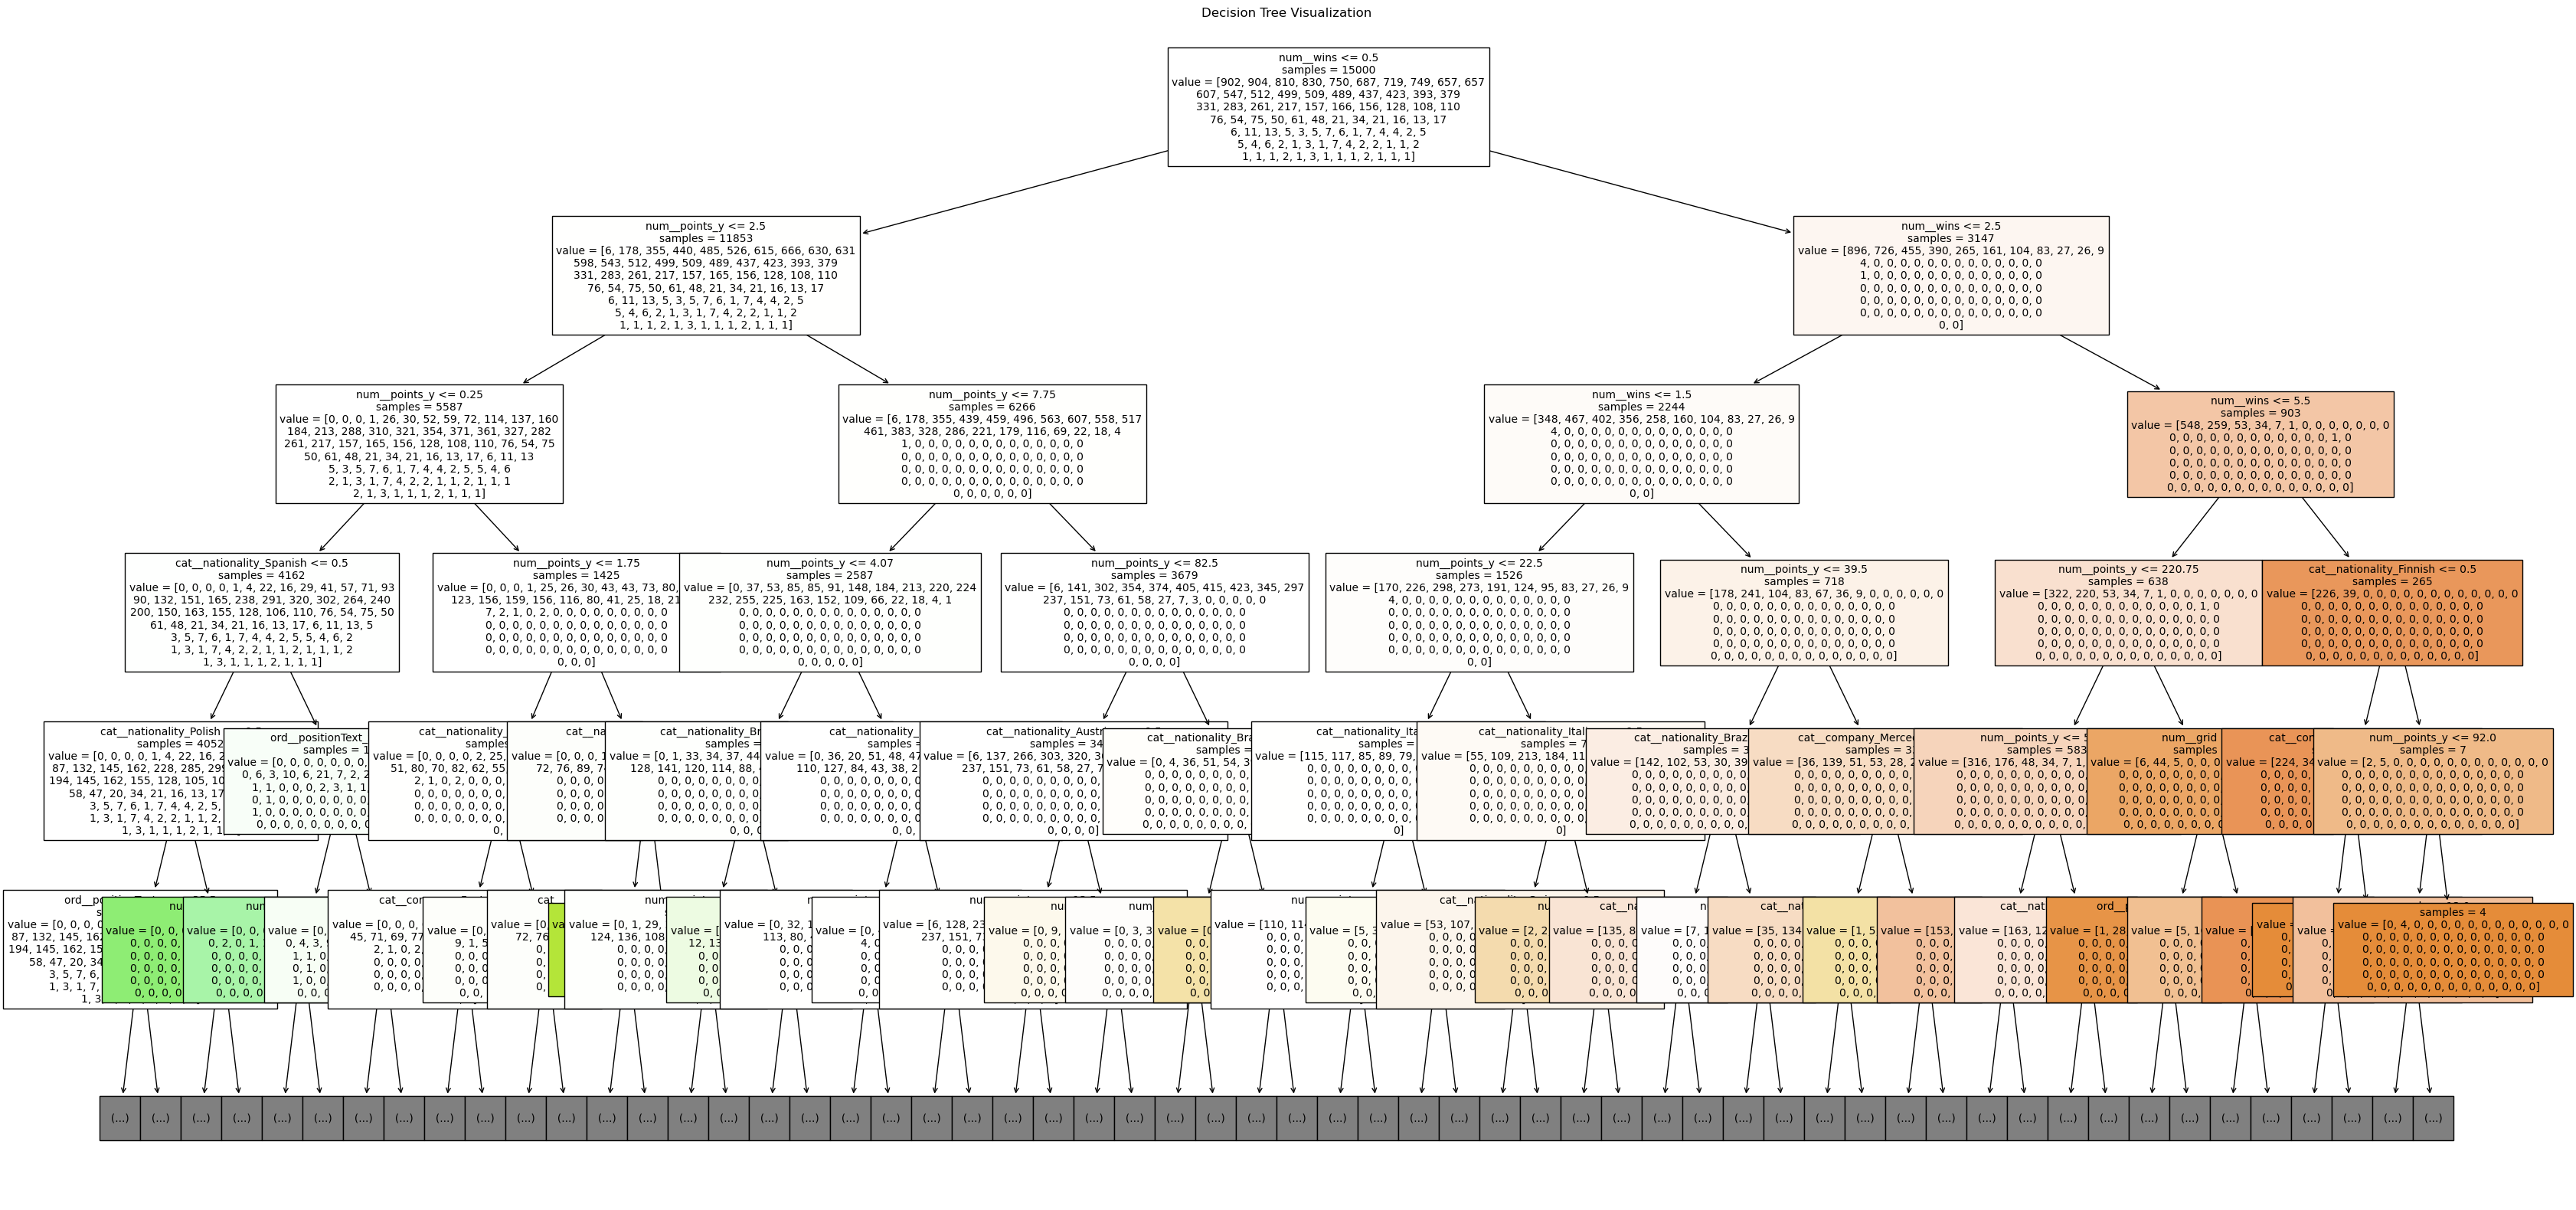

In [27]:
from sklearn.tree import plot_tree

# Extract the trained DecisionTreeClassifier from the pipeline
dt_model = pipeline_decision_tree.named_steps['model']

# Plot the tree
plt.figure(figsize=(40, 20))
plot_tree(
    dt_model,
    filled=True,
    feature_names=pipeline_decision_tree.named_steps['preprocess'].get_feature_names_out(),
    max_depth=5,  # Change this for deeper/shallower trees
    impurity=False,
    fontsize=10
)
plt.title("Decision Tree Visualization")
plt.show()

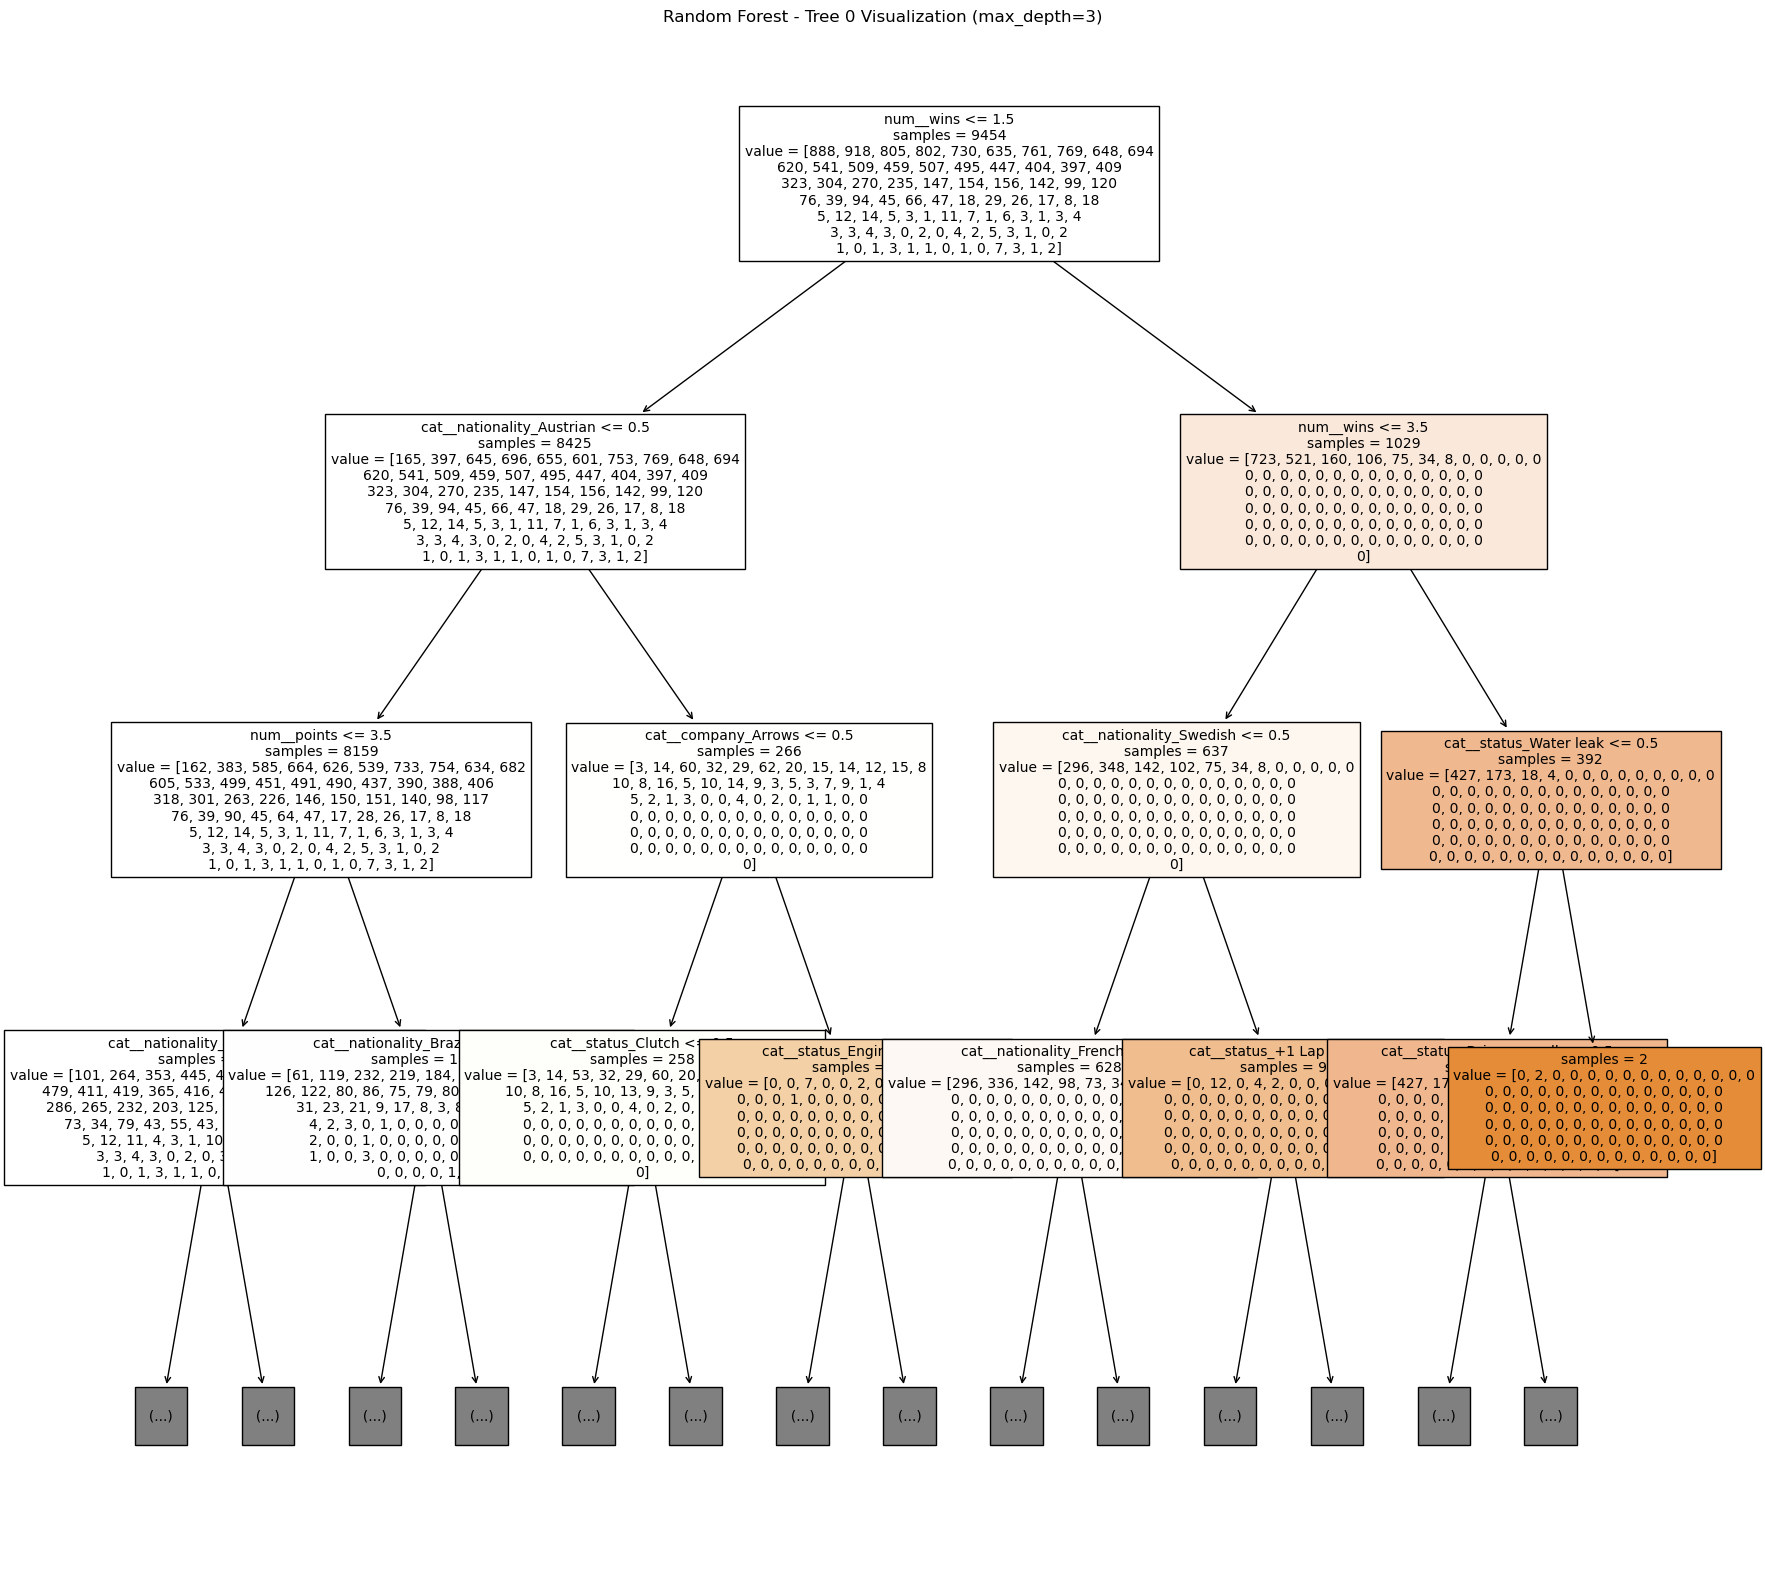

In [28]:
# Extract the trained RandomForestClassifier from the pipeline
rf_model = pipeline_forest.named_steps['model']

# Pick one tree from the forest (e.g., the first one)
estimator = rf_model.estimators_[0]

plt.figure(figsize=(20, 20))
plot_tree(
    estimator,
    filled=True,
    feature_names=pipeline_forest.named_steps['preprocess'].get_feature_names_out(),
    max_depth=3,
    impurity=False,
    fontsize=10
)
plt.title("Random Forest - Tree 0 Visualization (max_depth=3)")
plt.show()

### Accuracy Scores

In [29]:
accuracy_score(y_test, y_pred_decision_tree)

0.233

In [30]:
accuracy_score(y_test, y_pred_forest)

0.1948

## Your Turn: Pick an Evaluation Metric

Judging from our accuracy scores, both models seem to be performing poorly!

Let's use some other evaluation metrics.

1. Go visit scikit-learn's documentation on [different evaluation metrics](https://scikit-learn.org/stable/modules/model_evaluation.html)
2. Pick a 3-5 different evaluation metrics
3. Use them to see how the models' scores change!

### Question to Consider: Can we use any evaluation metric?

- Is `position` a categorical or numerical variable?

> Remember to import the evaluation metric and run the code to be able to use the functions from scikit-learn!

```python
# Example import
from sklearn.metrics import mean_squared_error
```

In [31]:
# TODO: Import any evaluation metric you want to use below



# TODO: Score your models



### Tune Your Models

Now, make your own pipelines (preprocessor and model) with tuned hyperparameters.

Test your models using new evaluation metrics.

To get you started, here is the code from above to create your own model.

```python
# Use a **pipeline** to combine preprocessing and modeling
pipeline_decision_tree = Pipeline([
    ('preprocess', preprocessor),
    ('model', DecisionTreeClassifier())
])

pipeline_forest = Pipeline([
    ('preprocess', preprocessor),
    ('model', RandomForestClassifier())
])
```

You will need to change some things about it to tune your hyperparameters. You can also use some other classification models to do so.

See available hyperparameters for:

- [DecisionTreeClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html#sklearn.tree.DecisionTreeClassifier)
- [RandomForestClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html)

In [32]:
# TODO: Create new pipelines/models with tuned hyperparameters


# TODO: Evaluate your new models with evaluation metrics